# Question 3: Bible Text Mining

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [135]:
bible = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/bible_asv.csv")
bible.head()

,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,In the beginning God created the heavens and t...
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,And the earth was waste and void; and darkness...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,"And God said, Let there be light: and there wa..."
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,"And God saw the light, that it was good: and G..."
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,"And God called the light Day, and the darkness..."


## Preprocessing

In [136]:
# drop features we will not use
bible = bible.drop(['Unnamed: 0','field','Chapters','Verses'], axis=1)
# convert to lower case
bible['text'] = bible['text'].str.lower()
# drop numbers and punctuation
bible['text'] = bible['text'].str.replace('[^\w\s]','')
bible['text'] = bible['text'].str.replace('\d+', '')
# strip whitespace before and after
bible['text'] = bible['text'].str.strip()
print (bible.shape)
bible.head()

(31103, 4)


,Testaments,Sections,Books,text
0,OT,Law,gen,in the beginning god created the heavens and t...
1,OT,Law,gen,and the earth was waste and void and darkness ...
2,OT,Law,gen,and god said let there be light and there was ...
3,OT,Law,gen,and god saw the light that it was good and god...
4,OT,Law,gen,and god called the light day and the darkness ...


I will now collapse the books from 31103 entries to 66.

In [137]:
bible_full = bible
# This collapses the books and joins the words, but also joins the other features accidentally
bible = bible.groupby('Books').agg(' '.join)
# This removes the extra sections
bible['Sections'] = [n.partition(' ')[0] for n in biblebooks['Sections']]
# This removes the extra testaments
bible['Testaments'] = [n.partition(' ')[0] for n in biblebooks['Testaments']]
print (bible.shape)
bible.head()

(66, 3)


,Testaments,Sections,text
Books,,,
1chro,OT,History,adam seth enosh kenan mahalalel jared enoch me...
1cor,NT,Paul,paul called to be an apostle of jesus christ t...
1john,NT,Apostles,that which was from the beginning that which w...
1kgs,OT,History,now king david was old and stricken in years a...
1pet,NT,Apostles,peter an apostle of jesus christ to the elect ...


Next is term frequency–inverse document frequency vectorization and removing stop words.

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(stop_words='english', max_features=500)
vec = pd.DataFrame(vector.fit_transform(bible.text).toarray(), columns = vector.get_feature_names())

## PCA

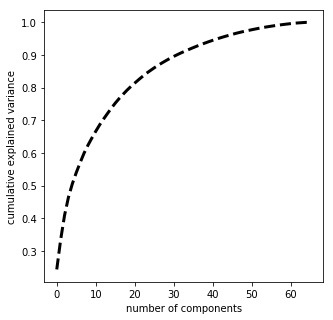

In [139]:
from sklearn.decomposition import PCA

plt.figure(figsize=(5,5))
pca = PCA().fit(vec)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'k--', linewidth=3)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

I will choose 30 components which will preserve 90% of the data.

In [140]:
num_components = 30

pca = PCA(n_components=num_components)
pca.fit(vec)
print (bible.shape)
biblePCA = pca.transform(vec)

(66, 3)


In [141]:
# add vectorized words to dataframe
for n , columnLabel in enumerate(vec.axes[1].tolist()):
    bible[columnLabel] = vec[columnLabel].tolist()
bible

,Testaments,Sections,text,aaron,able,abraham,according,afraid,altar,angel,...,world,wrath,written,wrought,ye,yea,year,years,young,zion
Books,,,,,,,,,,,,,,,,,,,,,
1chro,OT,History,adam seth enosh kenan mahalalel jared enoch me...,0.043582,0.012484,0.010121,0.035697,0.004998,0.019142,0.018939,...,0.001847,0.001560,0.006776,0.004916,0.020405,0.002474,0.003693,0.017165,0.004998,0.002237
1cor,NT,Paul,paul called to be an apostle of jesus christ t...,0.000000,0.021764,0.000000,0.021337,0.000000,0.016018,0.000000,...,0.133924,0.000000,0.056706,0.004571,0.418524,0.024153,0.000000,0.000000,0.000000,0.000000
1john,NT,Apostles,that which was from the beginning that which w...,0.000000,0.000000,0.000000,0.008812,0.000000,0.000000,0.000000,...,0.280790,0.000000,0.070255,0.000000,0.257185,0.008550,0.000000,0.000000,0.023030,0.000000
1kgs,OT,History,now king david was old and stricken in years a...,0.000000,0.002678,0.001737,0.041571,0.001430,0.055846,0.005417,...,0.000000,0.000000,0.020351,0.011249,0.017510,0.002123,0.044367,0.034814,0.012866,0.001919
1pet,NT,Apostles,peter an apostle of jesus christ to the elect ...,0.000000,0.000000,0.017927,0.112911,0.000000,0.000000,0.018637,...,0.032709,0.000000,0.030007,0.014513,0.510268,0.010955,0.000000,0.000000,0.000000,0.019811
1sam,OT,History,now there was a certain man of ramathaimzophim...,0.003083,0.002815,0.000000,0.008433,0.012022,0.005755,0.001265,...,0.001110,0.000938,0.000000,0.004927,0.051248,0.002975,0.009994,0.006569,0.025046,0.000000
1thes,NT,Paul,paul and silvanus and timothy unto the church ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.048791,0.017656,0.000000,0.462874,0.000000,0.000000,0.000000,0.000000,0.000000
1tim,NT,Paul,paul an apostle of christ jesus according to t...,0.000000,0.000000,0.000000,0.055087,0.000000,0.000000,0.000000,...,0.079790,0.016857,0.000000,0.000000,0.000000,0.000000,0.000000,0.016857,0.000000,0.000000
2chro,OT,History,and solomon the son of david was strengthened ...,0.014986,0.011728,0.003381,0.044715,0.001391,0.039962,0.001757,...,0.000000,0.016940,0.035367,0.013684,0.066155,0.003099,0.041635,0.069064,0.011130,0.001868


## Clustering

First I will use the elbow method to find the optimal number of clusters for KMeans

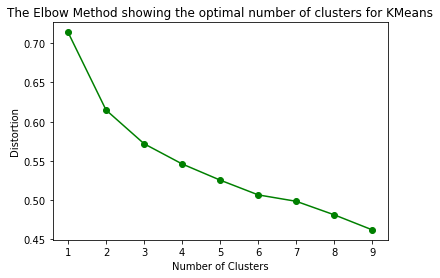

In [142]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(biblePCA)
    distortions.append(sum(np.min(cdist(biblePCA, kmeans.cluster_centers_, 'euclidean'), axis=1)) / biblePCA.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'go-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters for KMeans')
plt.show()

I think the optimal number is 3 clusters.

In [143]:
num_clusters = 3
labels = {}

## KMeans Clustering

In [144]:
labels['kmeans'] = KMeans(n_clusters=num_clusters).fit_predict(biblePCA)
bible['kmeans'] = labels['kmeans']

## Agglomerative Clustering

In [145]:
from sklearn.cluster import AgglomerativeClustering

labels['agglomerative'] = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=num_clusters).fit_predict(biblePCA)
bible['agglomerative'] = labels['agglomerative']

## DBSCAN Clustering

In [146]:
from sklearn.cluster import DBSCAN

labels['dbscan'] = DBSCAN().fit(biblePCA).labels_
bible['dbscan'] = labels['dbscan']

## Clustering Visualization

In [147]:
# split bible into old testament and new testament
isOT = []
for n, row in bible.iterrows():
    isOT.append(row['Testaments'] == 'OT')
bibleOT = bible.loc[isOT]
bibleNT = bible.loc[[not b for b in isOT]]

In [152]:
# split biblePCA into old testament and new testament
biblePCAot = []
biblePCAnt = []
for n, row in enumerate(biblePCA):
    if isOT[n]:
        biblePCAot.append(row.tolist())
    else:
        biblePCAnt.append(row.tolist())
biblePCAot = np.array(biblePCAot)
biblePCAnt = np.array(biblePCAnt)
section_sizes = {m:(n*10+50) for n, m in enumerate(bible['Sections'].unique())}

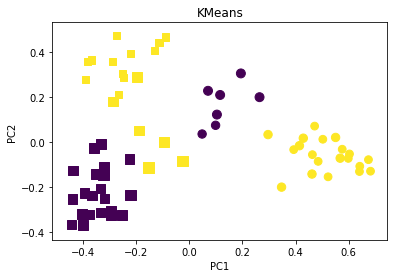

In [154]:
plt.scatter(biblePCAot[:, 0], biblePCAot[:, 1], c=bibleOT['kmeans'], marker='s', s=[section_sizes[e] for e in bibleOT['Sections'].tolist()], cmap='viridis')
plt.scatter(biblePCAnt[:, 0], biblePCAnt[:, 1], c=bibleNT['kmeans'], marker='o', s=[section_sizes[e] for e in bibleNT['Sections'].tolist()], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans')
plt.show()

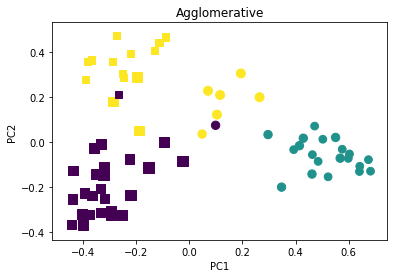

In [155]:
plt.scatter(biblePCAot[:, 0], biblePCAot[:, 1], c=bibleOT['agglomerative'], marker='s', s=[section_sizes[e] for e in bibleOT['Sections'].tolist()], cmap='viridis')
plt.scatter(biblePCAnt[:, 0], biblePCAnt[:, 1], c=bibleNT['agglomerative'], marker='o', s=[section_sizes[e] for e in bibleNT['Sections'].tolist()], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative')
plt.show()

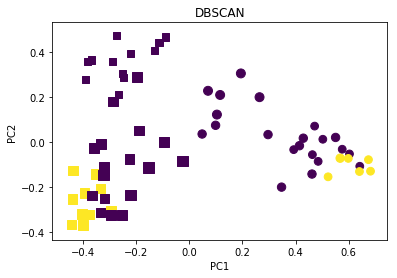

In [156]:
plt.scatter(biblePCAot[:, 0], biblePCAot[:, 1], c=bibleOT['dbscan'], marker='s', s=[section_sizes[e] for e in bibleOT['Sections'].tolist()], cmap='viridis')
plt.scatter(biblePCAnt[:, 0], biblePCAnt[:, 1], c=bibleNT['dbscan'], marker='o', s=[section_sizes[e] for e in bibleNT['Sections'].tolist()], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN')
plt.show()

A. What is the optimal number of clusters of these 66 Books? Find these clusters and describe them. Are you surprised at your finding? Why/Why not? Graph and color your clusters (probably on the first two PC's). On the graph, show your clusters in colors, the Testaments in plot symbols, and the Sections in sizes.

    fdas

i) How do the 2 Testaments fall into your clusters? Tabulate the counts in a table with rows showing Testaments in the given order and columns showing your clusters in the order of total frequencies. 

    fdsa

ii) How do the 7 Sections fall into your clusters? Tabulate the counts in a table with rows showing Sections in the given order and columns showing your clusters in the order of total frequencies. 

    fdsa

B. How would Association Analyses help to reveal characteristic word clusters? Produce word clouds for the top 10 words clusters with the top 100 most frquent words. Describe these word clusters, and what they are telling you about the Bible. How do these top 10 words clouds represent the 2 Testaments and the 7 Sections?

    fdsa

C. How would Seriation Analyses help to reveal the structure of these 66 Books?

    fdsa